In [95]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np

In [96]:
# Funcion de activacion 
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [97]:
# Inicializacion de los parametros 
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) #* 0
    b1 = np.random.randn(n_h, 1) #* 0
    W2 = np.random.randn(n_y, n_h) #* 0
    b2 = np.random.randn(n_y, 1) #* 0
    
    parameters = {
        "W1": W1,
        "b1" : b1,
        "W2": W2,
        "b2" : b2
    }
    return parameters

In [98]:
def forward_prop(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {
        "A1": A1,
        "A2": A2
    }
    return A2, cache

In [99]:
# Funcion de perdida
def loss_function(A2, Y):  # MAE
    cost = -np.sum(np.multiply(Y, np.log(A2)) +  np.multiply(1-Y, np.log(1-A2)))/m
    cost = np.squeeze(cost)

    return cost


def mse(Y, A2): # MSE
    return np.sum((Y - A2)**2)/m 

In [100]:
def backward_prop(X, Y, cache, parameters):
    A1 = cache["A1"]
    A2 = cache["A2"]

    W2 = parameters["W2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return grads

In [101]:
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    new_parameters = {
        "W1": W1,
        "W2": W2,
        "b1" : b1,
        "b2" : b2
    }

    return new_parameters

In [102]:
def model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate):
    parameters = initialize_parameters(n_x, n_h, n_y)
    param_evo = [] # 1. Para analizar convergencia
    cost_evo = [] # 2. Para analizar funcion de costo

    param_evo.append(parameters)

    for i in range(0, num_of_iters+1):
        a2, cache = forward_prop(X, parameters)

        cost = mse(a2, Y)
        cost_evo.append(cost)

        grads = backward_prop(X, Y, cache, parameters)

        parameters = update_parameters(parameters, grads, learning_rate)
        param_evo.append(parameters)

        if(i%100 == 0):
            print('Cost after iteration# {:d}: {:f}'.format(i, cost))

    return parameters, param_evo, cost_evo

In [103]:
def predict(X, parameters):
    a2, cache = forward_prop(X, parameters)
    yhat = a2
    yhat = np.squeeze(yhat)
    if(yhat >= 0.5):
        y_predict = 1
    else:
        y_predict = 0

    return y_predict

In [104]:
np.random.seed(2)

# The 4 training examples by columns
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# The outputs of the XOR for every example in X
Y = np.array([[0, 1, 1, 0]])

# No. of training examples
m = X.shape[1]

# Set the hyperparameters
n_x = 2     #No. of neurons in first layer
n_h = 2     #No. of neurons in hidden layer
n_y = 1     #No. of neurons in output layer
num_of_iters = 1000
learning_rate = 0.01

trained_parameters, param_evo, cost_evo = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate)

# Test 2X1 vector to calculate the XOR of its elements. 
# Try (0, 0), (0, 1), (1, 0), (1, 1)
X_test = np.array([[1], [1]])

print(trained_parameters)

y_predict = predict(X_test, trained_parameters)

print('Neural Network prediction for example ({:d}, {:d}) is {:d}'.format(
    X_test[0][0], X_test[1][0], y_predict))

Cost after iteration# 0: 0.357529
Cost after iteration# 100: 0.343009
Cost after iteration# 200: 0.322576
Cost after iteration# 300: 0.300981
Cost after iteration# 400: 0.284637
Cost after iteration# 500: 0.274225
Cost after iteration# 600: 0.267766
Cost after iteration# 700: 0.263618
Cost after iteration# 800: 0.260821
Cost after iteration# 900: 0.258849
Cost after iteration# 1000: 0.257402
{'W1': array([[-0.41518197, -0.03864294],
       [-2.07780569,  0.67458614]]), 'W2': array([[ 0.00113996, -0.5518287 ]]), 'b1': array([[-1.78224272],
       [-1.55334223]]), 'b2': array([[-0.53375515]])}
Neural Network prediction for example (1, 1) is 1


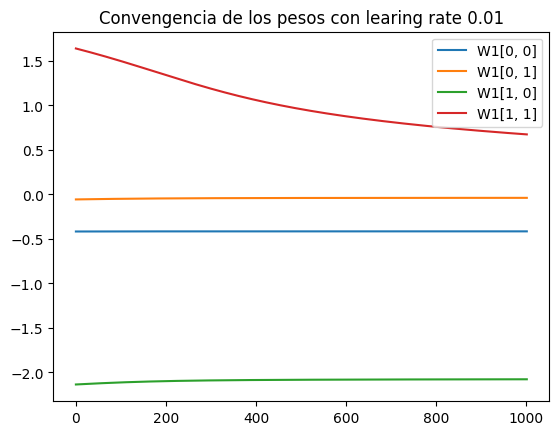

In [105]:
# graficar la convergencia de los parametros (pesos y sesgo)
import matplotlib.pyplot as plt

W1_evo = []
W2_evo = []
b1_evo = []
b2_evo = []

for i in range(len(param_evo)):
    W1_evo.append(param_evo[i]['W1'])
    W2_evo.append(param_evo[i]['W2'])
    b1_evo.append(param_evo[i]['b1'])
    b2_evo.append(param_evo[i]['b2'])

W1_evo = np.array(W1_evo)
W2_evo = np.array(W2_evo)
b1_evo = np.array(b1_evo)
b2_evo = np.array(b2_evo)

plt.plot(W1_evo[:, 0, 0], label='W1[0, 0]')
plt.plot(W1_evo[:, 0, 1], label='W1[0, 1]')
plt.plot(W1_evo[:, 1, 0], label='W1[1, 0]')
plt.plot(W1_evo[:, 1, 1], label='W1[1, 1]')
plt.title(f'Convengencia de los pesos con learing rate {learning_rate}')
plt.legend()
plt.show()

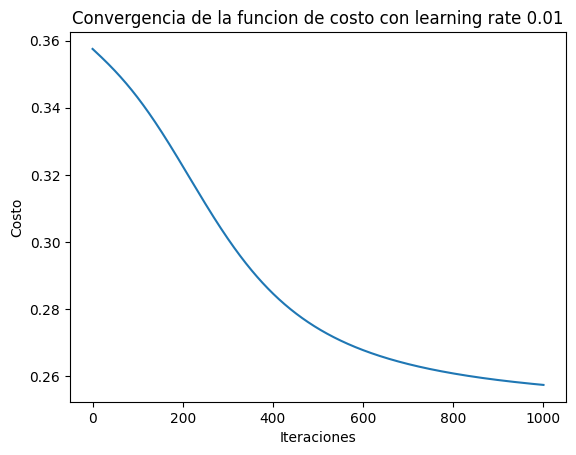

In [106]:
# convergencia de la funcion de costo en base a las iteraciones

plt.plot(cost_evo)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title(f'Convergencia de la funcion de costo con learning rate {learning_rate}')
plt.show()
